## Programa de Pós-Graduação em Ciência da Computação - CEFET/RJ
## Trabalho 3 - Aprendizado de Máquina

#### Aluna: Rebecca Pontes Salles, Professor: Eduardo Bezerra, Data: 20/11/2017

### Introdução

O seguinte relatório apresenta o desenvolvimento do terceiro trabalho prático da disciplina de Aprendizado de Máquina do curso de Mestrado em Ciência da Computação do CEFET/RJ. Este trabalho envolveu a implementação de algoritmos de Redes Neurais Completamente Conectadas e Convolucionais, utilizando a linguagem Python. Dados foram fornecidos como exemplo para aplicação dos códigos produzidos.

### Parte 1 - Redes Completamente Conectadas

Uma instituição financeira possui uma base de dados com o histórico de crediário oferecido aos seus clientes. Baseado neste histórico, a instituição deseja criar um modelo de classificação para inferir se um novo cliente que submeteu uma requisição de empréstimo pagará ou não a dívida, caso o banco resolva realizar esse empréstimo. O conjunto de dados possui 1500 exemplos de créditos concedidos aos seus clientes. Esses registros estão contidos no arquivo __credtrain.txt__, que é fornecido juntamente com esse documento. Para cada cliente, são definidos 11 atributos (variáveis, características). Além disso, a última coluna de
cada exemplo informa se o cliente honrou ou não o pagamento do empréstimo.

Nesta parte, você deve criar um modelo de classificação, por meio de uma rede neural de múltiplas camadas com propagação do erro (error backpropagation). O objetivo desse modelo de classificação é predizer se um novo cliente pagaria ou não uma dívida contraída, tendo como base as características desse novo cliente. Esse modelo deve ser criado com o uso de funções e classes fornecidas pelo _Keras_.

#### 1.1 - Um exemplo introdutório

Para servir de exemplo sobre o procedimento de criação de um modelo de classificação, é relevante que você realize no _keras_ os passos descritos nesta seção. O objetivo é que, ao fim desta seção, você tenha uma visão geral do processo de criação de um modelo de classificação em um exemplo pequeno e possa aplicá-lo a um exemplo maior (i.e., o conjunto de dados de crédito bancário). A sequência de passos descrita nesta seção representa a criação, treinamento (aprendizado) e teste de uma rede neural backpropagation com um conjunto de dados pequeno armazenado nas matrizes P e T. Após realizar esses passos, você deve aplicar o mesmo procedimento sobre o conjunto de dados de crédito (credtrain) fornecido neste trabalho, para finalmente obter o modelo
de classificação.

__Passo 1:__ Defina a matriz de padrões. Note que os padrões são organizados em colunas. Por exemplo, a matriz de padrões abaixo contém cinco padrões de entrada (cada um com quatro características), e o primeiro padrão armazenado na matriz _P_ abaixo é (0.4046, 0.9974, 0.3764, 0.6043).
$$P =
\left[\begin{array}{cc}
0.4046 & 0.3786 & 0.7010 & 0.8608 & 0.5947\\
0.9974 & 0.8479 & 0.6201 & 0.4031 & 0.9653\\
0.3764 & 0.9214 & 0.9331 & 0.7514 & 0.6914\\
0.6043 & 0.3494 & 0.1438 & 0.6035 & 0.4111
\end{array}\right]
$$

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

P = np.array(np.matrix([[0.4046,0.3786,0.7010,0.8608,0.5947],
                        [0.9974,0.8479,0.6201,0.4031,0.9653],
                        [0.3764,0.9214,0.9331,0.7514,0.6914],
                        [0.6043,0.3494,0.1438,0.6035,0.4111]]).T )

Using TensorFlow backend.


__Passo 2:__ Defina a matriz de alvos. Os valores dessa matriz de alvos são os que a rede deve aprender para cada padrão. Note que a quantidade de colunas na matriz de alvos deve ser sempre igual à quantidade de colunas da matriz de padrões. T = \[0 1 0 1 1\]

In [2]:
T = np.array([[0],[1],[0],[1],[1]])

__Passo 3:__ Crie uma rede neural artificial completamente conectada de uma única camada oculta, com 3 neurônios nessa camada oculta e 1 neurônio na camada de saída. Em ambas as camadas, a função de ativação deve ser a função sigmoide logística.

In [3]:
model = Sequential()
l1 = Dense(3, input_dim=4, activation='sigmoid')
model.add(l1)
l2 = Dense(1, activation='sigmoid')
model.add(l2)

__Passo 4:__ Realize a configuração da rede recém-criada, conforme instruções a seguir. Quantidade de épocas igual a 100000; Função de perda: soma dos erros quadrados; método de otimização: gradiente descendente estocástico.

In [4]:
sgd = SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

__Passo 5:__ Treine a rede neural. Esse é o passo em que os pesos e os limiares da rede são ajustados. Esse passo deve ser realizado com a função _fit_ da classe _Model_. Para chamar essa função, devemos passar a rede, a matriz de padrões e a matriz de alvos.

In [5]:
#a quantidade de épocas foi definida em 10000 para reduzir o tempo de execução
history = model.fit(P, T, batch_size=1, epochs=10000, verbose=0)

__Passo 6:__ Gere gráficos para visualizar o histórico de treinamento. Em particular, gere curvas da precisão e da função de custo contra a quantidade de épocas de treinamento.

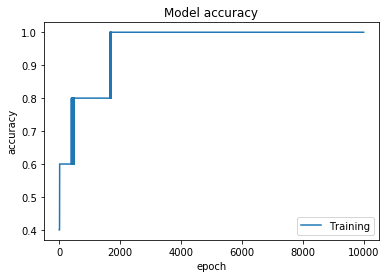

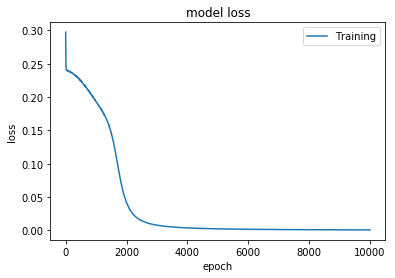

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Prediction of P [[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]]
Training loss: 0.000802720314823
Training accuracy: 1.0


In [8]:
# summarize history for accuracy
plt.plot(history.history['acc'], label="Training")
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
        
# summarize history for loss
plt.plot(history.history['loss'], label="Training")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

model.summary()

print ('Prediction of P',model.predict(P).round())

score = model.evaluate(P, T, verbose=0)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

#### 1.2 - Criação de modelo de predição de crédito

Após realizar os passos descritos acima, você deve ter condições de repeti-los para o conjunto de dados de créditos (credtrain). Uma vez treinada, essa rede poderá inferir se um novo cliente irá ou não honrar um eventual empréstimo.
Inicialmente, você deve carregar o arquivo __credtrain.txt__. Uma vez que os dados estão carregados, você deve criar duas matrizes. A primeira matriz deve ter ordem 1500 x 11 e deve conter os padrões de entrada (valores das variáveis ESTC, NDEP, RENDA, TIPOR, VBEM, NPARC, VPARC, TEL, IDADE, RESMS e ENTRADA). A outra matriz deve ter ordem 1500 x 1 e deve conter os valores do atributo CLASSE. Vamos chamar essas duas matrizes de P e T, respectivamente. A matriz P é chamada a matriz de treinamento. Já a matriz T é chamada a matriz de alvo. Um detalhe importante é que (no passo (6)), em vez de testar a rede sobre os padrões utilizados durante o treinamento, você deve testá-la sobre os dados contidos no arquivo __credtest.txt__, que também é fornecido. Isso permitirá que você avalie o quão efetivo foi o passo de treinamento da rede neural, ou seja, o quão adequado é o modelo de classificação.

A seguir é apresentado o código para carregamento dos dados: 

In [18]:
import numpy as np
import pandas as pd  

#filepath = data columns file path
#names = given column names
def importarDados(filepath,names,sep='\t'):
    #path = os.getcwd() + filepath  
    data = pd.read_csv(filepath, header=None, sep=sep, names=names)

    # separa os conjuntos de dados x (caracteristicas) e y (alvo)
    cols = data.shape[1]
    x = data.iloc[:,0:cols-1]
    y = data.iloc[:,cols-1:cols]
    
    # converte os valores em numpy arrays
    x = np.array(x.values)  
    y = np.array(y.values)
    
    return x,y

#Importing data
filepath = "Trabalho 3\credtrain.txt"
X,Y = importarDados(filepath,['ESTC', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
                              'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE'])
filepath = "Trabalho 3\credtest.txt"
X_test,Y_test = importarDados(filepath,['ESTC', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
                              'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE'])

Diferente do exemplo introdutório, um cuidado adicional que você deve ter é com relação à normalização dos dados de entrada da rede, posto que algumas variáveis possuem ordens de grandeza diferentes.

Para normalizar os dados utiliza-se o seguinte código:

In [19]:
def normalizarCaracteristica(x, mu=None, sigma=None):
    m = x.shape[0]

    if mu is None:
        mu = np.mean(x, axis=0)
    if sigma is None:
        sigma = np.std(x, axis=0, ddof=1)

    # don't change the intercept term
    mu[0] = 0.0
    sigma[0] = 1.0
    
    x_norm = np.array(x)
    for i in range(m):
        x_norm[i, :] = (x[i, :] - mu) / sigma

    return x_norm, mu, sigma

#Normalization of input data
X = normalizarCaracteristica(X)[0]
X_test = normalizarCaracteristica(X_test)[0]

Uma vez construídas as matrizes P e T, é possível criar, treinar e testar uma RNA de múltiplas camadas feed-forward com o uso do Keras. Essa rede neural corresponde ao modelo de classificação a ser desenvolvido neste trabalho. Outro detalhe importante é
que, no passo (3), você deve experimentar e utilizar diferentes quantidades de neurônios na camada intermediária para gerar uma boa taxa de acerto.

Para facilitar a tarefa de criação, treino e teste de redes neurais com o _keras_ foi desenvolvida uma função chamada __NNet__ que recebe as camadas(arquitetura) e os hiperparâmetros da rede e retorna o modelo RNA treinado e o objeto _history_ contendo informações sobre a precisão e sobre a função de custo durante o treinamento. O código desta função é apresentado a seguir:  

In [20]:
import matplotlib.pyplot as plt

def NNet(P,T,layers=[Dense(3,activation='sigmoid',input_shape=(4,)),
                     Dense(1,activation='sigmoid')],
         loss='mean_squared_error',optimizer=SGD(lr=0.1),metrics=['binary_accuracy'],
         epochs=100000,batch_size=1, verbose=0,validation_split=0.0,
         validation_data=None, shuffle=True, plot=True):
    
    model = Sequential()
    for layer in layers:
        model.add(layer)
        
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    history = model.fit(P, T, batch_size=batch_size, epochs=epochs, verbose=verbose,
                        validation_split=validation_split, validation_data=validation_data,
                        shuffle=shuffle)
    
    if(plot):
        if 'acc' in history.history.keys():
            # summarize history for accuracy
            plt.plot(history.history['acc'], label="Training")
            if validation_data != None:
                label="Test"
                plt.plot(history.history['val_acc'], label=label)
            elif validation_split > 0.0:
                label="Validation"
                plt.plot(history.history['val_acc'], label=label)        
            plt.title('Model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(loc='upper left')
            plt.show()
        
        if 'loss' in history.history.keys():
            # summarize history for loss
            plt.plot(history.history['loss'], label="Training")
            if validation_data != None:
                label="Test"
                plt.plot(history.history['val_loss'], label=label)
            elif validation_split > 0.0:
                label="Validation"
                plt.plot(history.history['val_loss'], label=label)        
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(loc='upper right')
            plt.show()
    
    return model,history

Crie também uma função para produzir a matriz de confusão (do termo original _confusion matrix_; veja maiores detalhes em http://en.wikipedia.org/wiki/Confusion_matrix) relativa aos resultados da fase de testes.

$$Confusion Matrix =
\left[\begin{array}{cc}
True Positives & False Positives\\
False Negatives & True Negatives
\end{array}\right]
$$

In [21]:
def confusion_matrix(y_true, y_pred):
    tp,fp,tn,fn = 0,0,0,0
    for i in range(0,len(y_pred)):
        if y_pred[i]:
            if y_true[i]:
                tp=tp+1
            else:
                fp=fp+1
        else:
            if y_true[i]:
                fn=fn+1
            else:
                tn=tn+1
    
    confM = np.matrix([[tp,fp],[fn,tn]])
    return confM

Foram feitos vários testes para definir alguns hiper-parâmetros da rede. Os resultados e a configuração escolhida são apresentados na tabela a seguir:

| Neurons | Batch size | Epoch | Learning Rate | Test Loss | Test Accuracy | False Positive | False Negative | Graphics |
|---------|------------|-------|---------------|-----------|---------------|----------------|----------------|----------|
| 3       | 32         | 250   | 0.1           | 0.0935    | 0.8821        | 19             | 49             | Close    |
| 4       | 32         | 250   | 0.1           | 0.0953    | 0.8804        | 20             | 49             | Close    |
| 5       | 32         | 250   | 0.1           | 0.0911    | 0.8838        | 18             | 49             | Close    |
| 6       | 32         | 250   | 0.1           | 0.0924    | 0.8838        | 18             | 49             | Close    |
| 7       | 32         | 250   | 0.1           | 0.0938    | 0.8804        | 20             | 49             | Close    |
| 8       | 32         | 250   | 0.1           | 0.0925    | 0.8821        | 19             | 49             | Close    |
| 9       | 32         | 250   | 0.1           | 0.0933    | 0.8821        | 19             | 49             | Close    |
| 10      | 32         | 250   | 0.1           | 0.0927    | 0.8821        | 19             | 49             | Close    |
| 11      | 32         | 250   | 0.1           | 0.0930    | 0.8821        | 19             | 49             | Close    |
| 20      | 32         | 250   | 0.1           | 0.0951    | 0.8821        | 19             | 49             | Close    |
| 50      | 32         | 250   | 0.1           | 0.0963    | 0.8821        | 19             | 49             | Close    |
| __5__       | __100__        | __250__   | __0.1__           | __0.0965__    | __0.8856__        | __18__             | __48__             | __Closer__   |
| 6       | 100        | 250   | 0.1           | 0.0955    | 0.8838        | 18             | 49             | Closer   |
| 11      | 100        | 250   | 0.1           | 0.0970    | 0.8856        | 18             | 49             | Closer   |

Train on 1500 samples, validate on 577 samples
Epoch 1/250
1500/1500 [==============================] - 1s 755us/step - loss: 0.2529 - acc: 0.5200 - val_loss: 0.2507 - val_acc: 0.5234
Epoch 2/250
1500/1500 [==============================] - 0s 25us/step - loss: 0.2500 - acc: 0.5360 - val_loss: 0.2485 - val_acc: 0.5390
Epoch 3/250
1500/1500 [==============================] - 0s 29us/step - loss: 0.2480 - acc: 0.5473 - val_loss: 0.2469 - val_acc: 0.5407
Epoch 4/250
1500/1500 [==============================] - 0s 31us/step - loss: 0.2464 - acc: 0.5500 - val_loss: 0.2456 - val_acc: 0.5407
Epoch 5/250
1500/1500 [==============================] - 0s 30us/step - loss: 0.2451 - acc: 0.5533 - val_loss: 0.2444 - val_acc: 0.5494
Epoch 6/250
1500/1500 [==============================] - 0s 35us/step - loss: 0.2439 - acc: 0.5547 - val_loss: 0.2432 - val_acc: 0.5529
Epoch 7/250
1500/1500 [==============================] - 0s 37us/step - loss: 0.2427 - acc: 0.5607 - val_loss: 0.2421 - val_acc: 0.5529


1500/1500 [==============================] - 0s 33us/step - loss: 0.1640 - acc: 0.7787 - val_loss: 0.1672 - val_acc: 0.7574
Epoch 61/250
1500/1500 [==============================] - 0s 41us/step - loss: 0.1626 - acc: 0.7787 - val_loss: 0.1659 - val_acc: 0.7591
Epoch 62/250
1500/1500 [==============================] - 0s 38us/step - loss: 0.1612 - acc: 0.7800 - val_loss: 0.1646 - val_acc: 0.7643
Epoch 63/250
1500/1500 [==============================] - 0s 36us/step - loss: 0.1598 - acc: 0.7833 - val_loss: 0.1633 - val_acc: 0.7643
Epoch 64/250
1500/1500 [==============================] - 0s 37us/step - loss: 0.1585 - acc: 0.7847 - val_loss: 0.1620 - val_acc: 0.7660
Epoch 65/250
1500/1500 [==============================] - 0s 41us/step - loss: 0.1572 - acc: 0.7860 - val_loss: 0.1608 - val_acc: 0.7660
Epoch 66/250
1500/1500 [==============================] - 0s 48us/step - loss: 0.1559 - acc: 0.7873 - val_loss: 0.1596 - val_acc: 0.7678
Epoch 67/250
1500/1500 [==============================

Epoch 120/250
1500/1500 [==============================] - 0s 32us/step - loss: 0.1123 - acc: 0.8813 - val_loss: 0.1169 - val_acc: 0.8700
Epoch 121/250
1500/1500 [==============================] - 0s 33us/step - loss: 0.1118 - acc: 0.8820 - val_loss: 0.1165 - val_acc: 0.8700
Epoch 122/250
1500/1500 [==============================] - 0s 37us/step - loss: 0.1114 - acc: 0.8820 - val_loss: 0.1160 - val_acc: 0.8700
Epoch 123/250
1500/1500 [==============================] - 0s 39us/step - loss: 0.1110 - acc: 0.8827 - val_loss: 0.1156 - val_acc: 0.8700
Epoch 124/250
1500/1500 [==============================] - 0s 41us/step - loss: 0.1105 - acc: 0.8827 - val_loss: 0.1151 - val_acc: 0.8700
Epoch 125/250
1500/1500 [==============================] - 0s 34us/step - loss: 0.1101 - acc: 0.8833 - val_loss: 0.1147 - val_acc: 0.8700
Epoch 126/250
1500/1500 [==============================] - 0s 40us/step - loss: 0.1097 - acc: 0.8827 - val_loss: 0.1143 - val_acc: 0.8752
Epoch 127/250
1500/1500 [=========

1500/1500 [==============================] - 0s 41us/step - loss: 0.0972 - acc: 0.8873 - val_loss: 0.1020 - val_acc: 0.8873
Epoch 180/250
1500/1500 [==============================] - 0s 37us/step - loss: 0.0971 - acc: 0.8873 - val_loss: 0.1019 - val_acc: 0.8873
Epoch 181/250
1500/1500 [==============================] - 0s 31us/step - loss: 0.0969 - acc: 0.8873 - val_loss: 0.1018 - val_acc: 0.8873
Epoch 182/250
1500/1500 [==============================] - 0s 32us/step - loss: 0.0968 - acc: 0.8873 - val_loss: 0.1017 - val_acc: 0.8873
Epoch 183/250
1500/1500 [==============================] - 0s 40us/step - loss: 0.0967 - acc: 0.8873 - val_loss: 0.1016 - val_acc: 0.8873
Epoch 184/250
1500/1500 [==============================] - 0s 37us/step - loss: 0.0966 - acc: 0.8873 - val_loss: 0.1014 - val_acc: 0.8873
Epoch 185/250
1500/1500 [==============================] - 0s 42us/step - loss: 0.0965 - acc: 0.8873 - val_loss: 0.1013 - val_acc: 0.8873
Epoch 186/250
1500/1500 [=======================

1500/1500 [==============================] - 0s 50us/step - loss: 0.0929 - acc: 0.8900 - val_loss: 0.0982 - val_acc: 0.8856
Epoch 238/250
1500/1500 [==============================] - 0s 50us/step - loss: 0.0929 - acc: 0.8893 - val_loss: 0.0982 - val_acc: 0.8856
Epoch 239/250
1500/1500 [==============================] - 0s 52us/step - loss: 0.0929 - acc: 0.8893 - val_loss: 0.0982 - val_acc: 0.8856
Epoch 240/250
1500/1500 [==============================] - 0s 71us/step - loss: 0.0928 - acc: 0.8893 - val_loss: 0.0981 - val_acc: 0.8856
Epoch 241/250
1500/1500 [==============================] - 0s 66us/step - loss: 0.0928 - acc: 0.8907 - val_loss: 0.0981 - val_acc: 0.8856
Epoch 242/250
1500/1500 [==============================] - 0s 67us/step - loss: 0.0927 - acc: 0.8893 - val_loss: 0.0981 - val_acc: 0.8856
Epoch 243/250
1500/1500 [==============================] - 0s 55us/step - loss: 0.0927 - acc: 0.8893 - val_loss: 0.0980 - val_acc: 0.8856
Epoch 244/250
1500/1500 [=======================

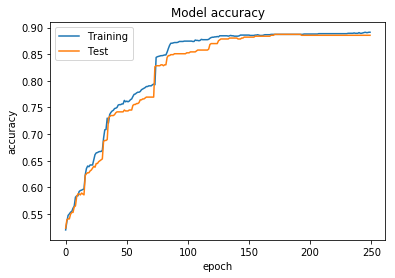

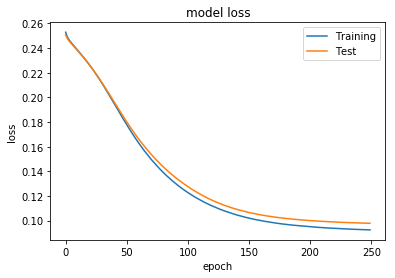

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 5)                 60        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.0978108652927
Test accuracy: 0.8856152513
Confusion matrix:
 [[223  18]
 [ 48 288]]


In [23]:
from keras.layers.core import Dense
from keras.optimizers import SGD

#Set parameters
input_shape=(11,)
layers=[Dense(5,activation='sigmoid',input_shape=input_shape),
        Dense(1,activation='sigmoid')]
loss='mean_squared_error'
optimizer=SGD(lr=0.1) #Test
metrics=['accuracy']
epochs=250
batch_size=100
validation_data=(X_test, Y_test)
shuffle=True
plot=True

model,history = NNet(X,Y,layers=layers,loss=loss,optimizer=optimizer,
                     metrics=metrics,epochs=epochs,batch_size=batch_size, verbose=1,
                     validation_data=validation_data,shuffle=shuffle, plot=plot)
model.summary()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Confusion matrix:\n', str(confusion_matrix(Y_test, model.predict(X_test).round())))

### Parte 2 - Redes Convolucionais

Nesta parte, você irá treinar modelos de redes neurais artificiais para classificar imagens. Em particular, dada uma imagem, seus modelos deverão indicar se a imagem contém um gato ou não. São fornecidos os conjuntos de imagens para treinamento e para teste (arquivos __train_catvnoncat.h5__ e __test_catvnoncat.h5__). É também fornecido o código para a leitura dos arquivos correspondentes.

In [29]:
import numpy as np
import h5py

def load_dataset():
    train_dataset = h5py.File(r'Trabalho 3\train_catvnoncat.h5',"r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #your train set labels
    
    test_dataset = h5py.File(r'Trabalho 3\test_catvnoncat.h5',"r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #your test set labels
    
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

Após ler os conjuntos de dados, você deve treinar dois modelos utilizando o _Keras_, conforme descrito a seguir:
1. Uma rede completamente conectada de uma única camada oculta e com uma camada de saída de duas unidades com softmax.
2. Uma rede convolucional.
Em ambos os casos acima, você deverá selecionar os hiperparâmetros e arquitetura de rede. Procure se basear nos exemplos de código e nas arquiteturas de rede apresentadas em aula. Em seu relatório, apresente os detalhes acerca da definição de cada uma dessas redes, assim como o desempenho encontrado em cada um dos casos.

#### 2.1 - Rede completamente conectada

In [31]:
import numpy as np
import keras
from keras.layers.core import Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

#Importando os dados
X,Y,X_test,Y_test,classes = load_dataset()

Exemplos de imagens do dataset:

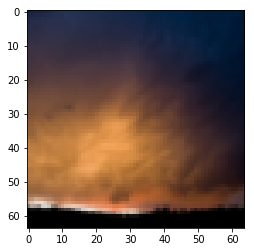

Classe da imagem: non-cat (y = 0)


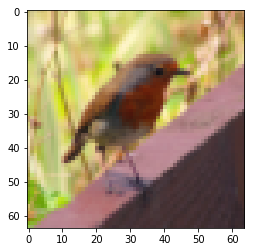

Classe da imagem: non-cat (y = 0)


In [38]:
# Exemplos de imagems de não-gatos
def showImage(index = 0):
    plt.imshow(X[index])
    plt.show()
    print ("Classe da imagem: "+classes[Y[0,index]].decode("utf-8")+" (y = "+str(Y[0,index])+")")
    
showImage(index = 0)
showImage(index = 10)

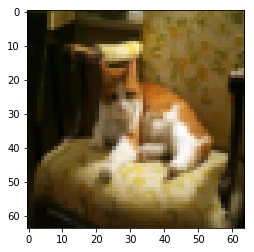

Classe da imagem: cat (y = 1)


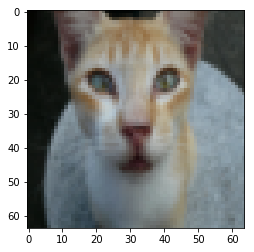

Classe da imagem: cat (y = 1)


In [39]:
# Exemplos de imagems de gatos
showImage(index = 7)
showImage(index = 11)

In [ ]:
Mais informações sobre o dataset:

In [45]:
print ("Número de exemplos de treinamento: " + str(X.shape[0]))
print ("Número de exemplos de teste: " + str(X_test.shape[0]))
print ("Cada imagem tem tamanho: (" + str(X.shape[1]) + ", " + str(X.shape[1]) + ", 3)")

Número de exemplos de treinamento: 209
Número de exemplos de teste: 50
Cada imagem tem tamanho: (64, 64, 3)


Um pré-processamento dos dados é necessário para a entrada da rede neural.

In [46]:
# Reformata ("achata") os exemplos de treino e teste
X_flatten = X.reshape(X.shape[0], -1).astype('float32')   # O "-1" faz a função reshape "achatar" o resto das dimensões
X_test_flatten = X_test.reshape(X_test.shape[0], -1).astype('float32')

# Padroniza os dados para que as características tenham valores entre 0 e 1
X_flatten = X_flatten/255
X_test_flatten = X_test_flatten/255
# Novo formato dos dados
print ("Novo formato dos dados de treino: " + str(X_flatten.shape))
print ("Novo formato dos dados de teste: " + str(X_test_flatten.shape))
print ("pixels x pixels x canais RGB = 64 x 64 x 3 = 12288")

# Converte os vetores de classes em matrizes de classes binárias
num_classes = len(classes)
Y_categ = keras.utils.to_categorical(Y, num_classes)
Y_test_categ = keras.utils.to_categorical(Y_test, num_classes)

Novo formato dos dados de treino: (209, 12288)
Novo formato dos dados de teste: (50, 12288)
pixels x pixels x canais RGB = 64 x 64 x 3 = 12288


Foram feitos vários testes para definir alguns hiper-parâmetros da rede. Os resultados e a configuração escolhida são apresentados na tabela a seguir:

| Neurons | Batch size | Epoch | Learning Rate | Dropout | Test Loss | Test Accuracy | False Positive | False Negative | Graphics            |
|---------|------------|-------|---------------|---------|-----------|---------------|----------------|----------------|---------------------|
| 5       | 128        | 20    | 0.001         | 0.2     | 0.7064    | 0.34          | 0              | 33             | Apart               |
| 5       | 128        | 20    | 0.0001        | 0.2     | 0.7120    | 0.34          | 0              | 33             | Apart               |
| 512     | 128        | 20    | 0.0001        | 0.2     | 1.1326    | 0.34          | 0              | 33             | Apart               |
| 512     | 128        | 50    | 0.0001        | 0.2     | 0.7718    | 0.49          | 0              | 25             | Apart               |
| 1024    | 128        | 50    | 0.0001        | 0.2     | 0.7272    | 0.59          | 2              | 18             | Apart               |
| 1024    | 128        | 25    | 0.0001        | 0.2     | 0.5544    | 0.739         | 13             | 0              | Close Unstable      |
| 512     | 128        | 25    | 0.0001        | 0.2     | 0.6178    | 0.72          | 5              | 9              | Close Less Unstable |
| __512__     | __128__        | __25__    | __0.0001__        | __0.0__     | __0.6032__    | __0.72__          | __14__             | __0__              | __Close Less Unstable__ |

O código usado nesta parte foi baseado no exemplo em https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py e os melhores parâmetros selecionados durante os testes foram dados como entrada para a rede completamente conectada apresentada a seguir junto com os seus resultados de precisão e custo.

Train on 209 samples, validate on 50 samples
Epoch 1/25
209/209 [==============================] - 2s 7ms/step - loss: 2.7405 - acc: 0.5550 - val_loss: 10.3794 - val_acc: 0.3400
Epoch 2/25
209/209 [==============================] - 1s 3ms/step - loss: 4.3342 - acc: 0.6555 - val_loss: 1.0327 - val_acc: 0.6600
Epoch 3/25
209/209 [==============================] - 1s 3ms/step - loss: 1.5113 - acc: 0.5646 - val_loss: 0.5721 - val_acc: 0.8200
Epoch 4/25
209/209 [==============================] - 1s 4ms/step - loss: 0.8073 - acc: 0.5742 - val_loss: 0.5579 - val_acc: 0.6800
Epoch 5/25
209/209 [==============================] - 1s 4ms/step - loss: 0.9794 - acc: 0.4450 - val_loss: 0.5793 - val_acc: 0.7400
Epoch 6/25
209/209 [==============================] - 1s 4ms/step - loss: 0.6486 - acc: 0.6172 - val_loss: 0.7461 - val_acc: 0.4000
Epoch 7/25
209/209 [==============================] - 1s 4ms/step - loss: 0.5909 - acc: 0.6746 - val_loss: 0.6569 - val_acc: 0.5000
Epoch 8/25
209/209 [==========

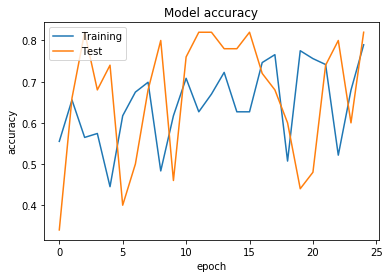

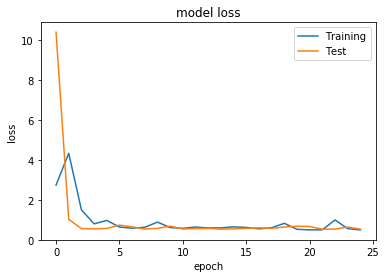

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               6291968   
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 1026      
Total params: 6,292,994
Trainable params: 6,292,994
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.541538252831
Test accuracy: 0.820000004768
Confusion matrix:
 [[29  5]
 [ 4 12]]


In [47]:
#Set parameters
input_shape=(12288,)
layers=[Dense(512,activation='relu',input_shape=input_shape),
        Dense(num_classes,activation='softmax')]
loss='categorical_crossentropy'
optimizer=RMSprop(lr=0.0001)
metrics=['accuracy']
epochs=25
batch_size=128
validation_data=(X_test_flatten, Y_test_categ)
shuffle=True
plot=True

model,history = NNet(X_flatten,Y_categ,layers=layers,loss=loss,optimizer=optimizer,
                     metrics=metrics,epochs=epochs,batch_size=batch_size, verbose=1,
                     validation_data=validation_data,shuffle=shuffle, plot=plot)
model.summary()

score = model.evaluate(X_test_flatten, Y_test_categ, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Confusion matrix:\n', str(confusion_matrix(np.argmax(Y_test_categ,axis=1), np.argmax(model.predict(X_test_flatten).round(),axis=1))))

Como se pode ver pelos gráficos gerados, apesar da instabilidade nas curvas de precisão, as curvas da função de custo com base no treino e no teste são bastante próximas e consideravelmente baixas sendo também estáveis durante a maior parte do treinamento. Além disso, a precisão do teste chegou a atingir __82%__, um resultado que pode ser considerado bastante satisfatório.

#### 2.2 - Rede convolucional

Analogamente à rede conectada, m pré-processamento dos dados é necessário para a entrada da rede neural.

In [80]:
# Padroniza os dados para que as características tenham valores entre 0 e 1
X_std = (X/255).astype('float32')
X_test_std = (X_test/255).astype('float32')
# Novo formato dos dados
print ("Formato dos dados de treino: " + str(X_flatten.shape))
print ("Formato dos dados de teste: " + str(X_test_flatten.shape))
print ("pixels x pixels x canais RGB = 64 x 64 x 3 = 12288")

# Converte os vetores de classes em matrizes de classes binárias
num_classes = len(classes)
Y_categ = keras.utils.to_categorical(Y, num_classes)
Y_test_categ = keras.utils.to_categorical(Y_test, num_classes)


Formato dos dados de treino: (209, 12288)
Formato dos dados de teste: (50, 12288)
pixels x pixels x canais RGB = 64 x 64 x 3 = 12288


Foram feitos vários testes para definir alguns hiper-parâmetros da rede. Os resultados e a configuração escolhida são apresentados na tabela a seguir:

| Config | Neurons            | Batch size | Epoch | Learning Rate | Dropout  | Test Loss | Test Accuracy | False Positive | False Negative | Graphics         |
|--------|--------------------|------------|-------|---------------|----------|-----------|---------------|----------------|----------------|------------------|
| __Mnist__  | __64,128,256__         | __128__        | __12__    | __0.0001__        | __0.25,0.5__ | __0.6840__    | __0.60__          | __2__              | __18__             | __Reasonably Close__ |
| Mnist  | 32,64,128          | 128        | 12    | 0.0001        | 0.25,0.5 | 0.6283    | 0.69          | 2              | 13             | Apart            |
| cifar  | 32,32,64,64,512    | 128        | 12    | 0.0001        | 0.25,0.5 | -         | 0.34          | -              | -              | -                |
| cifar  | 64,64,128,128,512  | 128        | 12    | 0.0001        | 0.25,0.5 | -         | 0.34          | -              | -              | -                |
| cifar  | 64,64,128,128,1024 | 128        | 12    | 0.0001        | 0.25,0.5 | -         | 0.34          | -              | -              | -                |

O código usado nesta parte foi baseado no exemplo em https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py e os melhores parâmetros selecionados durante os testes foram dados como entrada para a rede convolucional apresentada a seguir junto com os seus resultados de precisão e custo.

Train on 209 samples, validate on 50 samples
Epoch 1/12
209/209 [==============================] - 8s 36ms/step - loss: 0.7237 - acc: 0.5885 - val_loss: 0.6394 - val_acc: 0.7400
Epoch 2/12
209/209 [==============================] - 6s 31ms/step - loss: 0.6361 - acc: 0.6124 - val_loss: 0.9726 - val_acc: 0.3400
Epoch 3/12
209/209 [==============================] - 6s 28ms/step - loss: 0.6164 - acc: 0.6268 - val_loss: 0.8654 - val_acc: 0.3400
Epoch 4/12
209/209 [==============================] - 6s 30ms/step - loss: 0.5654 - acc: 0.6555 - val_loss: 0.7029 - val_acc: 0.3600
Epoch 5/12
209/209 [==============================] - 6s 28ms/step - loss: 0.5647 - acc: 0.6507 - val_loss: 0.6858 - val_acc: 0.4600
Epoch 6/12
209/209 [==============================] - 6s 28ms/step - loss: 0.5353 - acc: 0.7129 - val_loss: 0.6372 - val_acc: 0.7400
Epoch 7/12
209/209 [==============================] - 6s 30ms/step - loss: 0.5581 - acc: 0.6986 - val_loss: 0.6515 - val_acc: 0.6800
Epoch 8/12
209/209 [====

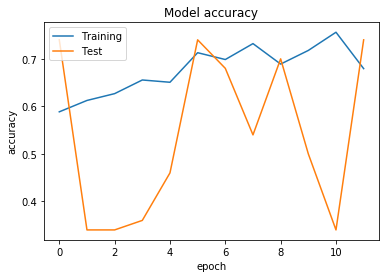

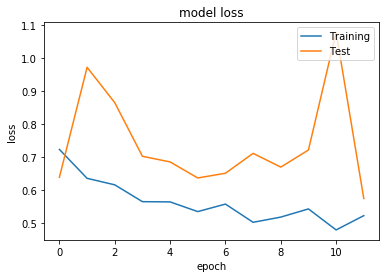

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                1843264   
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
__________

In [105]:
import keras
from keras.layers.core import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

#Set parameters
input_shape = (X_std.shape[1], X_std.shape[2], X_std.shape[3])
layers=[Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')]
loss='categorical_crossentropy'
optimizer=RMSprop(lr=0.0001, decay=1e-5)
metrics=['accuracy']
epochs=12
batch_size=64
validation_data=(X_test_std, Y_test_categ)
shuffle=True
plot=True

model,history = NNet(X_std,Y_categ,layers=layers,loss=loss,optimizer=optimizer,
                     metrics=metrics,epochs=epochs,batch_size=batch_size, verbose=1,
                     validation_data=validation_data,shuffle=shuffle, plot=plot)
model.summary()

score = model.evaluate(X_test_std, Y_test_categ, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Confusion matrix:\n', str(confusion_matrix(np.argmax(Y_test_categ,axis=1), np.argmax(model.predict(X_test_std).round(),axis=1))))

Como se pode ver pelos gráficos gerados, apesar da instabilidade nas curvas de precisão e nas curvas da função de custo, a precisão do teste chegou a atingir __74%__, um resultado que pode ser considerado bastante satisfatório.

Testando com imagens reais:

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


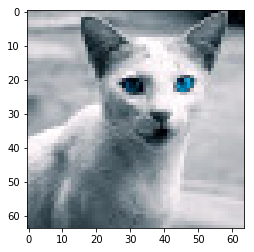

y = 1, previsão de classe: cat


In [103]:
from scipy import ndimage

img_path = r'Trabalho 3\blue_eyed_cat.jpg' 
fname=img_path
num_px = 64
image = np.array(ndimage.imread(fname, flatten=False))
image_flatten= image.reshape(1, num_px, num_px, 3)#.reshape((1, num_px*num_px*3))
plt.imshow(image)
plt.show()
predicted_class = np.argmax(model.predict(image_flatten).round(),axis=1)[0]

print("y = " + str(predicted_class) + ", previsão de classe: "+ classes[predicted_class].decode("utf-8"))

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.


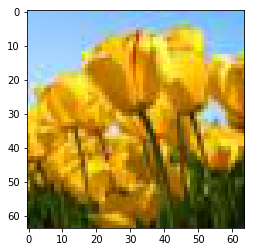

y = 0, previsão de classe: non-cat


In [104]:
img_path = r'Trabalho 3\flower.jpg' 
fname=img_path
num_px = 64
image = np.array(ndimage.imread(fname, flatten=False))
image_flatten= image.reshape(1, num_px, num_px, 3)#.reshape((1, num_px*num_px*3))
plt.imshow(image)
plt.show()
predicted_class = np.argmax(model.predict(image_flatten).round(),axis=1)[0]

print("y = " + str(predicted_class) + ", previsão de classe: "+ classes[predicted_class].decode("utf-8"))